# Exploratory data analysis

### Load data

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

salary_df = pd.read_csv('../data/01_raw/salary.csv')
people_df = pd.read_csv('../data/01_raw/people.csv')
descriptions_df = pd.read_csv('../data/01_raw/descriptions.csv')

In [129]:
print(f"Dataset shape: {salary_df.shape}")
salary_df.head()

Dataset shape: (375, 2)


,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0


In [130]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      375 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


Two null salary -> Remove in the data processing steps

In [131]:
salary_df.describe()

,id,Salary
count,375.000000,373.000000
mean,187.000000,100577.345845
std,108.397417,48240.013482
min,0.000000,350.000000
25%,93.500000,55000.000000
50%,187.000000,95000.000000
75%,280.500000,140000.000000
max,374.000000,250000.000000


In [132]:
print(f"Dataset shape: {people_df.shape}")
people_df.head()

Dataset shape: (375, 6)


,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0


In [133]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


In [134]:
# Check values in Education Level column and check how many are in each category
print(people_df['Education Level'].unique())
print(people_df['Education Level'].value_counts())


["Bachelor's" "Master's" 'PhD' nan]
Education Level
Bachelor's    222
Master's       97
PhD            51
Name: count, dtype: int64


In [135]:
# Check values in Job Title column and check how many are in each category
print(people_df['Job Title'].unique())
print(people_df['Job Title'].value_counts())

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 nan 'Event Coordinator' 'VP of Finance' 'Graphic Designer'
 'UX Researc

In [136]:
def group_job_titles(title):
    """
    Group job titles into meaningful categories based on seniority and department.
    
    Args:
        title: The job title string
        
    Returns:
        A string representing the job title group
    """
    if pd.isna(title):
        return "Unknown"
        
    title = str(title).lower()
    
    # Extract seniority
    if "junior" in title or "jr" in title:
        seniority = "Junior"
    elif "senior" in title or "sr" in title or "principal" in title:
        seniority = "Senior" 
    elif "director" in title or "chief" in title or "vp" in title or "ceo" in title or "cto" in title:
        seniority = "Executive"
    else:
        seniority = "Mid-level"
        
    # Extract department/function
    if any(word in title for word in ["engineer", "developer", "software", "web", "technical", "network", "it ", "data scientist"]):
        department = "Technical"
    elif any(word in title for word in ["sales", "account", "business development"]):
        department = "Sales"
    elif any(word in title for word in ["marketing", "social media", "content", "copywriter"]):
        department = "Marketing"
    elif any(word in title for word in ["hr", "human resources", "recruit"]):
        department = "HR"
    elif any(word in title for word in ["finance", "financial", "accountant"]):
        department = "Finance"
    elif any(word in title for word in ["data", "analyst", "research", "scientist"]):
        department = "Analytics"
    elif any(word in title for word in ["product", "ux", "design"]):
        department = "Product"
    elif any(word in title for word in ["operations", "supply chain"]):
        department = "Operations"
    elif any(word in title for word in ["customer", "service", "support"]):
        department = "Customer Service"
    else:
        department = "Other"
        
    return f"{seniority}_{department}"

In [137]:
df = people_df.copy()
# Apply job title grouping function
df['Job Title Group'] = df['Job Title'].apply(group_job_titles)
# Check values in Job Title Group column and check how many are in each category
print(df['Job Title Group'].unique())
print(df['Job Title Group'].value_counts())

['Mid-level_Technical' 'Mid-level_Analytics' 'Senior_Other'
 'Mid-level_Sales' 'Executive_Other' 'Mid-level_Marketing'
 'Mid-level_Product' 'Senior_Analytics' 'Mid-level_HR' 'Mid-level_Finance'
 'Mid-level_Other' 'Mid-level_Customer Service' 'Mid-level_Operations'
 'Senior_Technical' 'Executive_Sales' 'Executive_Operations'
 'Junior_Technical' 'Executive_Marketing' 'Unknown' 'Executive_Finance'
 'Junior_Sales' 'Senior_Finance' 'Executive_Analytics' 'Executive_HR'
 'Junior_Product' 'Senior_Marketing' 'Senior_HR' 'Senior_Product'
 'Junior_Marketing' 'Junior_HR' 'Junior_Analytics' 'Senior_Sales'
 'Junior_Other' 'Junior_Customer Service' 'Junior_Finance'
 'Senior_Operations' 'Executive_Product' 'Junior_Operations'
 'Executive_Technical']
Job Title Group
Senior_Technical              28
Senior_Marketing              27
Senior_Analytics              22
Junior_Marketing              20
Junior_Analytics              17
Junior_Sales                  16
Senior_Other                  16
Senior_Pr

We can join data using 'id' variable

In [138]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


We have some NA's or NULL data

In [139]:
print(f"Dataset shape: {descriptions_df.shape}")
descriptions_df.head()

Dataset shape: (375, 2)


,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...


## Analysis of target variable 'Salary'

/home/cristian/repos/challenge-salary-prediction/venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


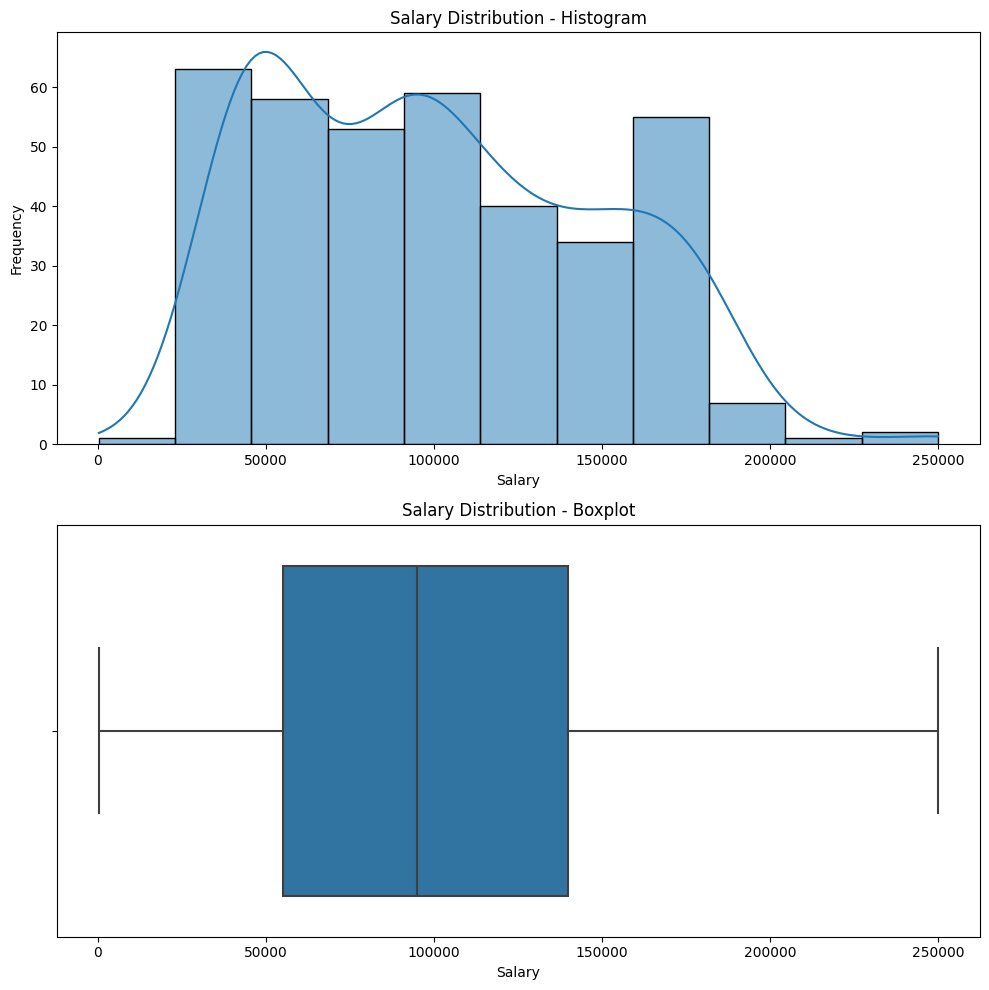

In [140]:
plt.figure(figsize=(10, 10))

# Histogram
plt.subplot(2, 1, 1)
sns.histplot(salary_df['Salary'], kde=True)
plt.title('Salary Distribution - Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=salary_df['Salary'], orient='h')
plt.title('Salary Distribution - Boxplot')
plt.xlabel('Salary')

plt.tight_layout()
plt.show()


In [141]:
# Check for skewness
print(f"Skewness: {salary_df['Salary'].skew()}")

Skewness: 0.400578053273342


The distribution is slightly right-skewed. Salary tend to be clustered towards the lower end. Seems to not be skewed enough to necessarily require transformation.

### Visualize the relationships between features and the target variable.

In [142]:
merged_data = salary_df.merge(people_df, on='id', how='left')
merged_data.head()

,id,Salary,Age,Gender,Education Level,Job Title,Years of Experience
0,0,90000.0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,65000.0,28.0,Female,Master's,Data Analyst,3.0
2,2,150000.0,45.0,Male,PhD,Senior Manager,15.0
3,3,60000.0,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,200000.0,52.0,Male,Master's,Director,20.0


## Correlation analysis

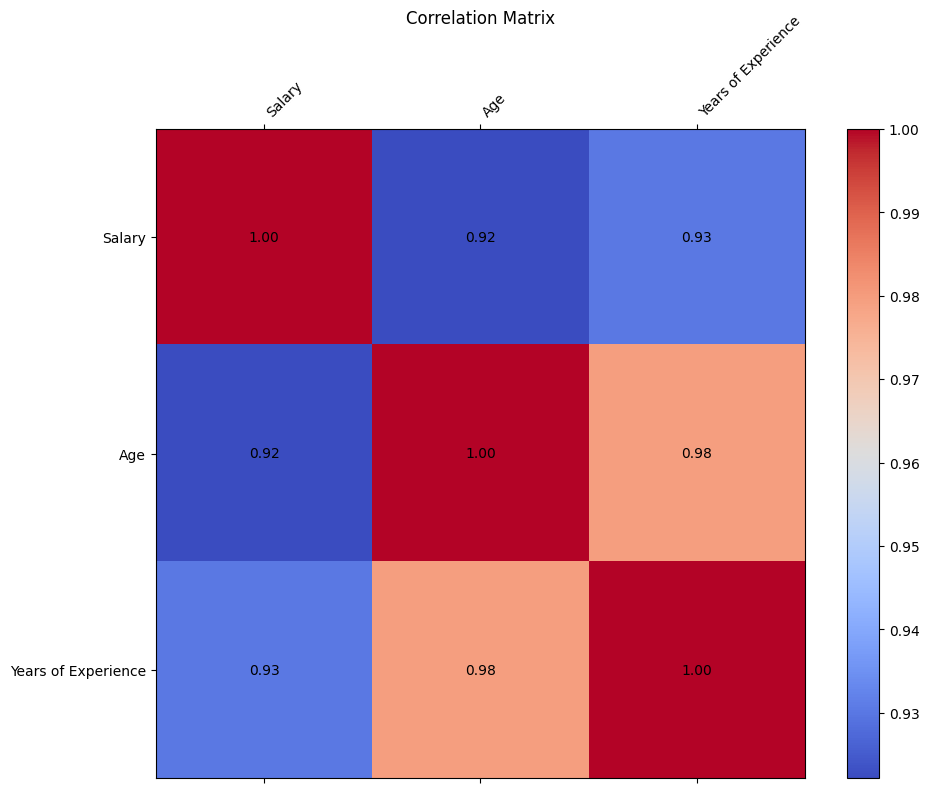

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make sure you calculate the correlation matrix first:
numeric_cols = merged_data.select_dtypes(include=['int64', 'float64']).drop(columns=['id']).columns
correlation = merged_data[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation.values, cmap="coolwarm")  # Use .values to ensure it's a 2D array
fig.colorbar(cax)

# Annotate with correlation values
for (i, j), val in np.ndenumerate(correlation.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

ax.set_xticks(range(len(correlation.columns)))
ax.set_yticks(range(len(correlation.columns)))
ax.set_xticklabels(correlation.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation.columns)
ax.set_title("Correlation Matrix", y=1.15)
plt.tight_layout()
plt.show()


There is a high positive correlation between the salary and the numerical features age and years of experience. This is expected.

## Categorical variables analysis

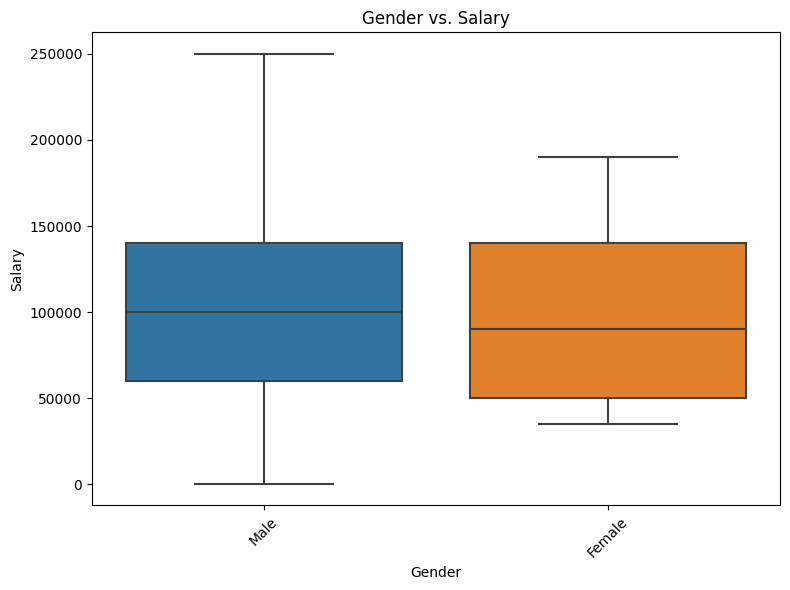

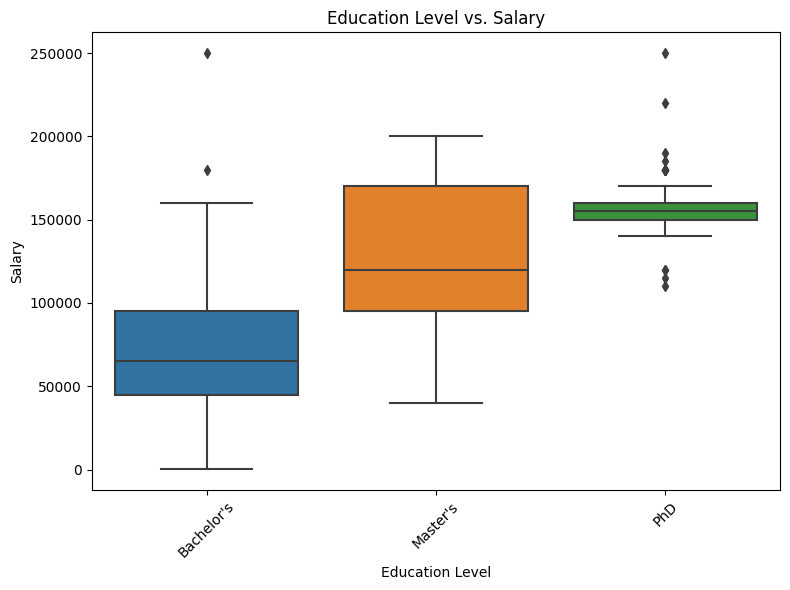

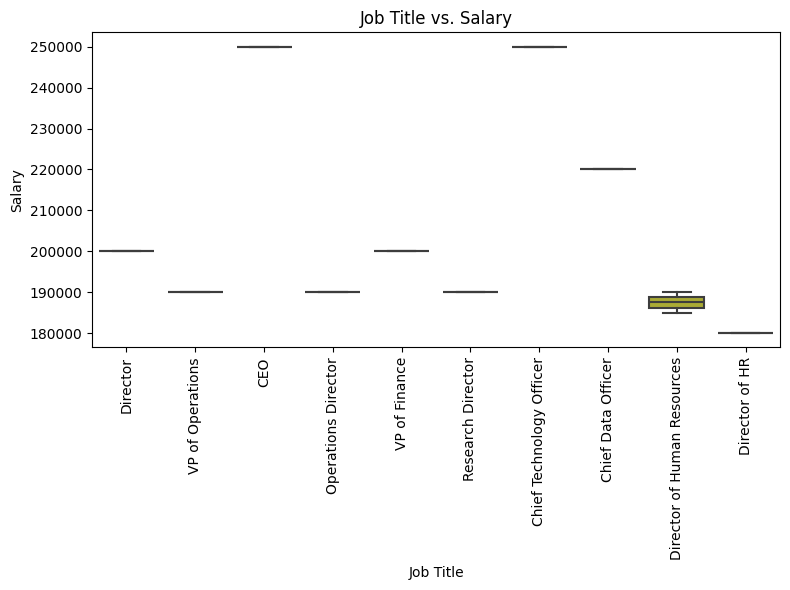

In [144]:
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Create visualizations for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    if merged_data[col].nunique() < 10:
        # For columns with few unique values
        sns.boxplot(x=col, y='Salary', data=merged_data)
        plt.xticks(rotation=45)
    else:
        # For columns with many unique values
        # Group and show top 10 categories by average salary
        top_categories = merged_data.groupby(col)['Salary'].mean().sort_values(ascending=False).head(10).index
        sns.boxplot(x=col, y='Salary', data=merged_data[merged_data[col].isin(top_categories)])
        plt.xticks(rotation=90)
    
    plt.title(f'{col} vs. Salary')
    plt.tight_layout()
    plt.show()

# Look at text features - if job descriptions are available
if 'job_description' in merged_data.columns:
    # Sample first 5 job descriptions to understand the data
    print("Sample job descriptions:")
    for i, desc in enumerate(merged_data['job_description'].head(5)):
        print(f"\nDescription {i+1}:\n{desc[:300]}...")

From the numerical variables we can see that the higher education levels get's a better salary. and that C-level exexutives are better paid.

We need to take care of the encoding of the Job Title

## Outlier Detection

We will try a z-score based approach with the median given the skewed distribution of the salary.

In [145]:
def modified_z_score(data, column, threshold=3.5):
    median_val = data[column].median()
    # Calculate the median absolute deviation (MAD)
    mad = np.median(np.abs(data[column] - median_val))
    
    # Calculate modified z-scores
    if mad == 0:  # Handle case where MAD is zero
        print("Warning: MAD is zero. Using regular Z-score instead.")
        return z_score(data, column, threshold)
    
    modified_z = 0.6745 * (data[column] - median_val) / mad
    
    # Identify outliers
    outliers = data[abs(modified_z) > threshold]
    return outliers, modified_z

mod_z_outliers, mod_z_scores = modified_z_score(salary_df, 'Salary')
print(f"\nModified Z-score Outliers (count: {len(mod_z_outliers)}):")


Modified Z-score Outliers (count: 0):


## Feature Interactions


--- Age and Years of Experience Interaction ---
Correlation between Age and Years of Experience: 0.9778
Base model R² (Age, Experience): 0.8517
Model with interaction R²: 0.8484

--- Education Level and Salary Interaction ---
Education Level Salary Statistics:
                          mean    median           std  count
Education Level                                              
Bachelor's        75133.700441   65000.0  34726.718482    227
Master's         129896.907216  120000.0  41863.987242     97
PhD              157843.137255  155000.0  23393.479903     51
ANOVA: F-value = 157.9631, p-value = 0.000000
Education Level has a significant effect on Salary


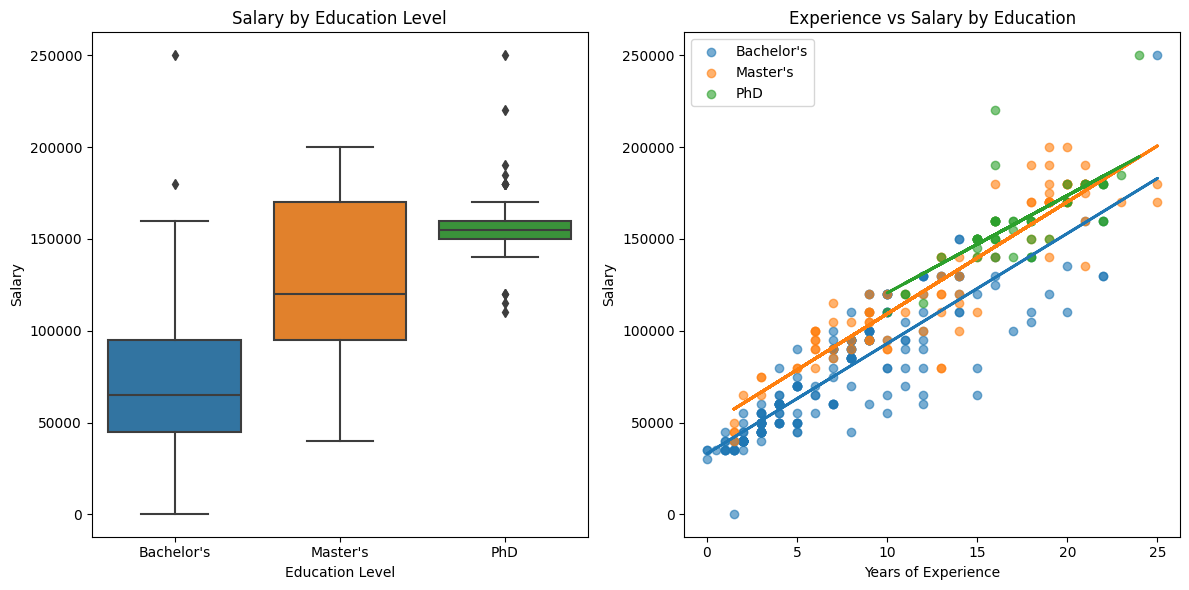


--- Job Title and Salary Interaction ---
Top 10 highest-paying job titles:
                                 mean  count
Job Title                                   
CEO                          250000.0      1
Chief Technology Officer     250000.0      1
Chief Data Officer           220000.0      1
Director                     200000.0      1
VP of Finance                200000.0      1
Operations Director          190000.0      1
VP of Operations             190000.0      1
Research Director            190000.0      1
Director of Human Resources  187500.0      2
Director of HR               180000.0      1

Bottom 10 lowest-paying job titles:
                                       mean  count
Job Title                                         
Customer Success Rep                40000.0      1
Junior Developer                    40000.0      1
Technical Support Specialist        40000.0      1
Junior Operations Coordinator       40000.0      1
Junior Designer                     40000

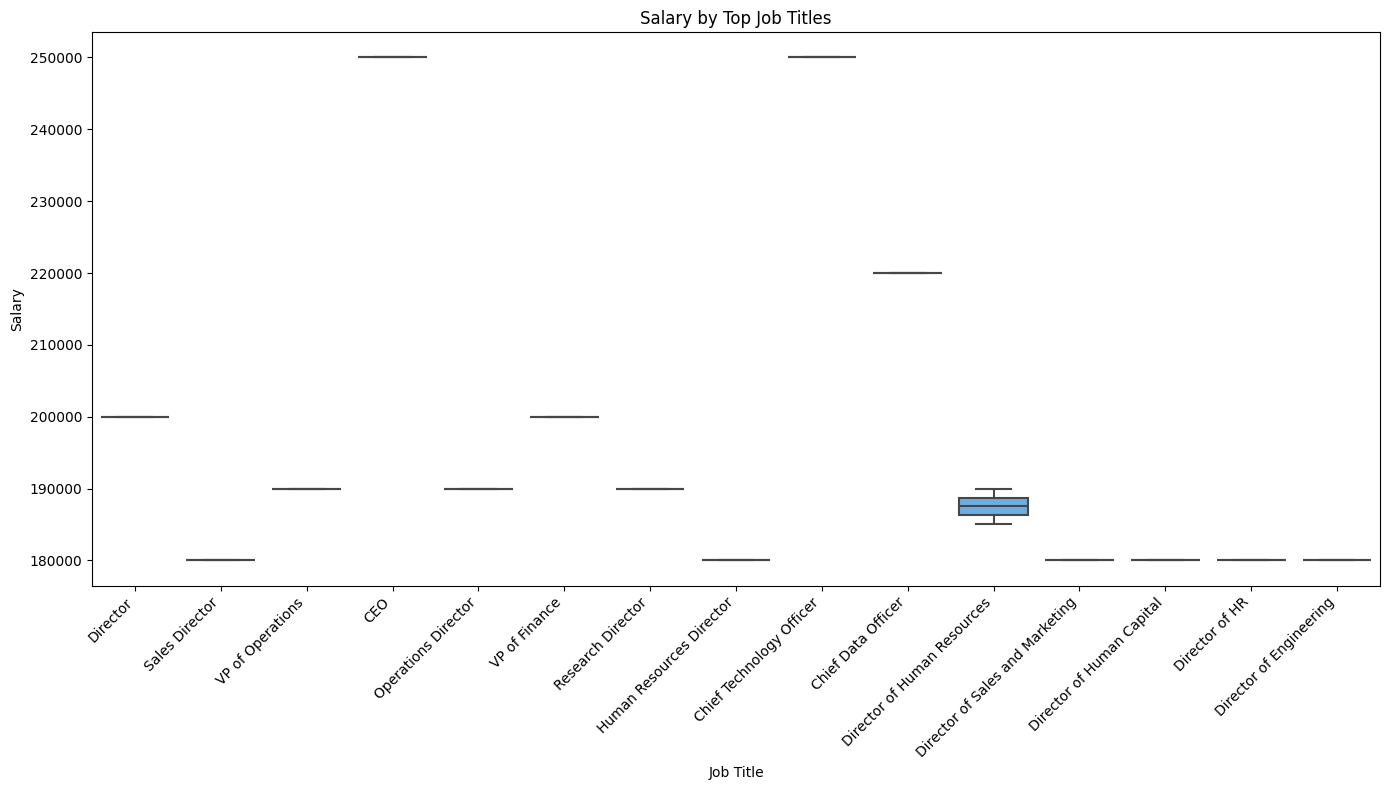


--- Machine Learning Feature Selection Analysis ---
Linear Regression Model Performance:
                                  Features        R²   Std Dev
0                  Base (Age + Experience)  0.851671  0.113626
1                    Base + Age*Experience  0.848444  0.115541
2                         Base + Education  0.868060  0.083284
3  Base + Education + Education*Experience  0.864236  0.092528
4                         Base + Job Title  0.849490  0.122525
5             Base + Education + Job Title  0.865610  0.092410
6              All Features + Interactions  0.853437  0.097779

Random Forest Model Performance:
                                  Features        R²   Std Dev
0                  Base (Age + Experience)  0.830777  0.097327
1                    Base + Age*Experience  0.839914  0.091008
2                         Base + Education  0.859173  0.071186
3  Base + Education + Education*Experience  0.863395  0.073096
4                         Base + Job Title  0.859247  0.1

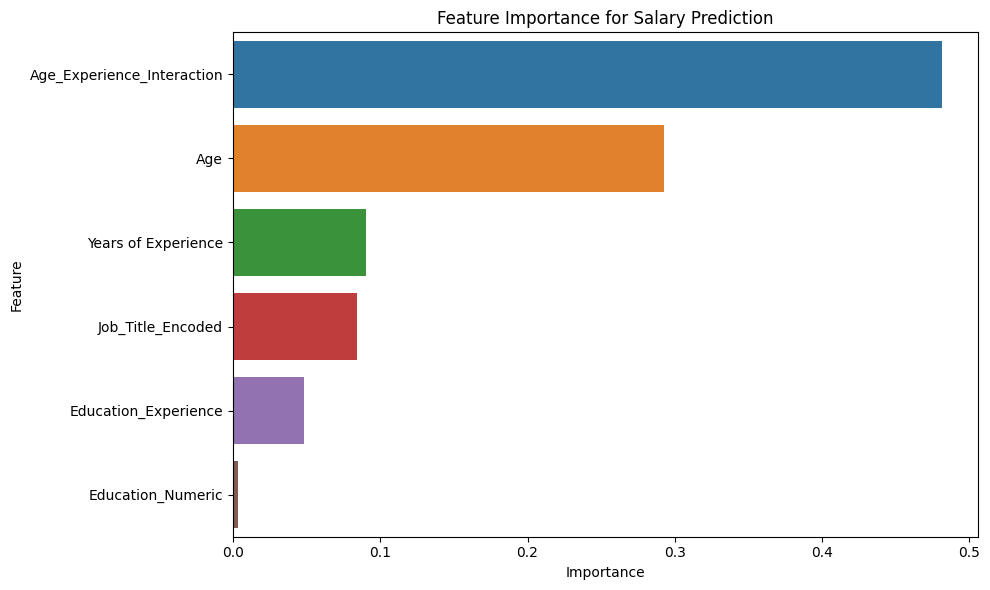


--- Feature Interaction Summary and ML Pipeline Recommendations ---
1. Age and Years of Experience:
   - Correlation: 0.9778
   - R² improvement with interaction: -0.0032
   Recommendation: Interaction doesn't significantly improve model

2. Education Level and Salary:
   - ANOVA shows significant effect of education on salary
   Recommendation: Include education level as a feature

3. Job Title and Salary:
   - Strong salary differences between job titles observed
   Recommendation: Include job title as a categorical feature (encoded)

Best Machine Learning Pipeline Approach:
1. Feature Engineering:
   - Create Age*Experience interaction term
   - Convert Education Level to ordinal values
   - Encode Job Titles appropriately (consider grouping similar titles)
   - Consider creating Education*Experience interaction

2. Model Selection:
   - Random Forest performed better than Linear Regression
   - Best feature combination: All Features + Interactions

3. Preprocessing:
   - Handle mi

<Figure size 640x480 with 0 Axes>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Let's assume df is your dataframe with all the data
# If you need to load it separately, uncomment the next line
df = merged_data

# Make a copy to avoid modifying the original dataframe
df_analysis = df.copy()

# Handle missing values for analysis
df_analysis['Age'] = df_analysis['Age'].fillna(df_analysis['Age'].median())
df_analysis['Years of Experience'] = df_analysis['Years of Experience'].fillna(df_analysis['Years of Experience'].median())
df_analysis['Education Level'] = df_analysis['Education Level'].fillna(df_analysis['Education Level'].mode()[0])
df_analysis['Job Title'] = df_analysis['Job Title'].fillna(df_analysis['Job Title'].mode()[0])
df_analysis['Salary'] = df_analysis['Salary'].fillna(df_analysis['Salary'].median())

# 1. Age and Years of Experience Interaction
print("\n--- Age and Years of Experience Interaction ---")

# Correlation
correlation = df_analysis['Age'].corr(df_analysis['Years of Experience'])
print(f"Correlation between Age and Years of Experience: {correlation:.4f}")

# Visualization
plt.figure(figsize=(10, 8))

# Scatter plot
plt.subplot(2, 2, 1)
plt.scatter(df_analysis['Age'], df_analysis['Years of Experience'], alpha=0.5)
plt.title('Age vs Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')

# Add regression line
x = df_analysis['Age'].values.reshape(-1, 1)
y = df_analysis['Years of Experience']
regressor = LinearRegression()
regressor.fit(x, y)
plt.plot(df_analysis['Age'], regressor.predict(x), color='red', linewidth=2)

# Hexbin plot (for density)
plt.subplot(2, 2, 2)
plt.hexbin(df_analysis['Age'], df_analysis['Years of Experience'], gridsize=20, cmap='Blues')
plt.title('Density: Age vs Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.colorbar(label='count')

# Create interaction feature
df_analysis['Age_Experience_Interaction'] = df_analysis['Age'] * df_analysis['Years of Experience'] / 100  # Scaled down

# Testing interaction feature's impact on salary prediction
X_base = df_analysis[['Age', 'Years of Experience']].values
X_interaction = df_analysis[['Age', 'Years of Experience', 'Age_Experience_Interaction']].values
y = df_analysis['Salary'].values

# Simple model without interaction
model_base = LinearRegression()
scores_base = cross_val_score(model_base, X_base, y, cv=5, scoring='r2')

# Model with interaction term
model_interaction = LinearRegression()
scores_interaction = cross_val_score(model_interaction, X_interaction, y, cv=5, scoring='r2')

print(f"Base model R² (Age, Experience): {np.mean(scores_base):.4f}")
print(f"Model with interaction R²: {np.mean(scores_interaction):.4f}")

# Plot Salary against interaction term
plt.subplot(2, 2, 3)
plt.scatter(df_analysis['Age_Experience_Interaction'], df_analysis['Salary'], alpha=0.5)
plt.title('Age*Experience Interaction vs Salary')
plt.xlabel('Age*Experience Interaction')
plt.ylabel('Salary')

plt.tight_layout()
plt.savefig('age_experience_interaction.png')
plt.close()

# 2. Education Level and Salary Interaction
print("\n--- Education Level and Salary Interaction ---")

# Convert education level to numerical using mapping
education_order = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
df_analysis['Education_Numeric'] = df_analysis['Education Level'].map(education_order)

# Box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Education Level', y='Salary', data=df_analysis)
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')

# Group statistics
education_stats = df_analysis.groupby('Education Level')['Salary'].agg(['mean', 'median', 'std', 'count'])
print("Education Level Salary Statistics:")
print(education_stats)

# ANOVA to test if education level impacts salary
education_groups = []
for edu in education_order.keys():
    if edu in df_analysis['Education Level'].values:
        group = df_analysis[df_analysis['Education Level'] == edu]['Salary']
        if not group.empty:
            education_groups.append(group)

if len(education_groups) >= 2:  # Need at least 2 groups for ANOVA
    f_val, p_val = stats.f_oneway(*education_groups)
    print(f"ANOVA: F-value = {f_val:.4f}, p-value = {p_val:.6f}")
    if p_val < 0.05:
        print("Education Level has a significant effect on Salary")
    else:
        print("Education Level does not have a significant effect on Salary")

# Education and Experience Interaction
plt.subplot(1, 2, 2)
for edu, group in df_analysis.groupby('Education Level'):
    plt.scatter(group['Years of Experience'], group['Salary'], alpha=0.6, label=edu)
    
    # Add regression lines for each education level
    x = group['Years of Experience'].values.reshape(-1, 1)
    y = group['Salary'].values
    if len(x) > 1:  # Need at least 2 points for regression
        regressor = LinearRegression()
        regressor.fit(x, y)
        plt.plot(x, regressor.predict(x), linewidth=2)
        
plt.title('Experience vs Salary by Education')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.tight_layout()
plt.savefig('education_salary_interaction.png')
plt.show()
#plt.close()

# Create education interaction terms
df_analysis['Education_Experience'] = df_analysis['Education_Numeric'] * df_analysis['Years of Experience']

# 3. Job Title and Salary Interaction
print("\n--- Job Title and Salary Interaction ---")

# Calculate mean salary by job title group
job_title_salary = df_analysis.groupby('Job Title')['Salary'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("Top 10 highest-paying job titles:")
print(job_title_salary.head(10))
print("\nBottom 10 lowest-paying job titles:")
print(job_title_salary.tail(10))

# If you have job title groups already (as mentioned in your paste.txt)
if 'Job Title Group' in df_analysis.columns:
    # Box plot of job title groups
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 1, 1)
    top_groups = df_analysis.groupby('Job Title Group')['Salary'].median().sort_values(ascending=False).head(15).index
    plot_data = df_analysis[df_analysis['Job Title Group'].isin(top_groups)]
    sns.boxplot(x='Job Title Group', y='Salary', data=plot_data)
    plt.title('Salary by Top Job Title Groups')
    plt.xlabel('Job Title Group')
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('job_title_salary.png')
    plt.show()
 #   plt.close()
else:
    # If job title groups don't exist, create a simple visualization of top job titles
    plt.figure(figsize=(14, 8))
    top_jobs = job_title_salary.head(15).index
    plot_data = df_analysis[df_analysis['Job Title'].isin(top_jobs)]
    sns.boxplot(x='Job Title', y='Salary', data=plot_data)
    plt.title('Salary by Top Job Titles')
    plt.xlabel('Job Title')
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('job_title_salary.png')
    plt.show()
  #  plt.close()

# Encoding job titles for ML models
label_encoder = LabelEncoder()
df_analysis['Job_Title_Encoded'] = label_encoder.fit_transform(df_analysis['Job Title'])

# Machine Learning Pipeline Testing
print("\n--- Machine Learning Feature Selection Analysis ---")

# Test how different feature combinations affect model performance
features_sets = [
    ['Age', 'Years of Experience'],
    ['Age', 'Years of Experience', 'Age_Experience_Interaction'],
    ['Age', 'Years of Experience', 'Education_Numeric'],
    ['Age', 'Years of Experience', 'Education_Numeric', 'Education_Experience'],
    ['Age', 'Years of Experience', 'Job_Title_Encoded'],
    ['Age', 'Years of Experience', 'Education_Numeric', 'Job_Title_Encoded'],
    ['Age', 'Years of Experience', 'Education_Numeric', 'Job_Title_Encoded', 'Age_Experience_Interaction', 'Education_Experience']
]

feature_names = [
    "Base (Age + Experience)",
    "Base + Age*Experience",
    "Base + Education",
    "Base + Education + Education*Experience",
    "Base + Job Title",
    "Base + Education + Job Title",
    "All Features + Interactions"
]

# Linear Regression
print("Linear Regression Model Performance:")
results_lr = []
for features, name in zip(features_sets, feature_names):
    X = df_analysis[features].values
    y = df_analysis['Salary'].values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    results_lr.append({
        'Features': name,
        'R²': np.mean(scores),
        'Std Dev': np.std(scores)
    })

results_lr_df = pd.DataFrame(results_lr)
print(results_lr_df)

# Random Forest (handles non-linear interactions better)
print("\nRandom Forest Model Performance:")
results_rf = []
for features, name in zip(features_sets, feature_names):
    X = df_analysis[features].values
    y = df_analysis['Salary'].values
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results_rf.append({
        'Features': name,
        'R²': np.mean(scores),
        'Std Dev': np.std(scores)
    })

results_rf_df = pd.DataFrame(results_rf)
print(results_rf_df)

# Feature importance from Random Forest
print("\nFeature Importance Analysis:")
# Use the most comprehensive feature set
best_features = features_sets[-1]
X = df_analysis[best_features].values
y = df_analysis['Salary'].values

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': best_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Salary Prediction')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
#plt.close()

# Summary and recommendations for ML pipeline
print("\n--- Feature Interaction Summary and ML Pipeline Recommendations ---")
print("1. Age and Years of Experience:")
print(f"   - Correlation: {correlation:.4f}")
print(f"   - R² improvement with interaction: {np.mean(scores_interaction) - np.mean(scores_base):.4f}")
print("   Recommendation: " + 
      ("Include interaction term in ML pipeline" if np.mean(scores_interaction) > np.mean(scores_base) else 
       "Interaction doesn't significantly improve model"))

print("\n2. Education Level and Salary:")
if 'f_val' in locals() and p_val < 0.05:
    print("   - ANOVA shows significant effect of education on salary")
    print("   Recommendation: Include education level as a feature")
else:
    print("   - No strong statistical evidence for education effect")
    print("   Recommendation: Test model with and without education feature")

print("\n3. Job Title and Salary:")
print("   - Strong salary differences between job titles observed")
print("   Recommendation: Include job title as a categorical feature (encoded)")

print("\nBest Machine Learning Pipeline Approach:")
print(f"1. Feature Engineering:")
print("   - Create Age*Experience interaction term")
print("   - Convert Education Level to ordinal values")
print("   - Encode Job Titles appropriately (consider grouping similar titles)")
print("   - Consider creating Education*Experience interaction")

print("\n2. Model Selection:")
if results_rf_df['R²'].max() > results_lr_df['R²'].max():
    print("   - Random Forest performed better than Linear Regression")
    print(f"   - Best feature combination: {feature_names[results_rf_df['R²'].argmax()]}")
else:
    print("   - Linear Regression performed better than Random Forest")
    print(f"   - Best feature combination: {feature_names[results_lr_df['R²'].argmax()]}")

print("\n3. Preprocessing:")
print("   - Handle missing values")
print("   - Scale numerical features")
print("   - Use one-hot encoding for categorical features with no inherent order")
print("   - Use ordinal encoding for ordered categories like education level")

Given the results Age*Experience can be a good feature to add for tree based methods, Education*Experience also can be considered.

### Conclusions
The EDA revealed that salary is positively correlated with age, years of experience, and education level. Higher degrees and executive-level job titles are associated with higher salaries. Grouping job titles into broader categories proved useful for reducing dimensionality. Although the Age × Experience interaction showed limited value in linear models, it contributed to performance gains in tree-based models. No major outliers were detected, and missing data was minimal and manageable. 